### Correlation and Regression Line

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Let us say we want to study the relationship between weight and mpg variables of a car in this data.

We shall start with draw a scatter plot between these variables

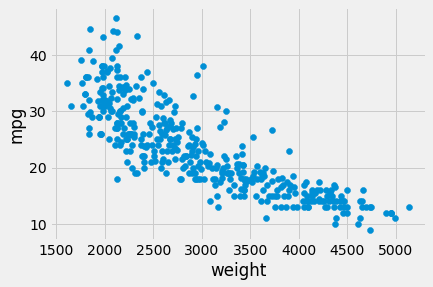

In [0]:
plt.scatter(df['weight'], df['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg');


Is this accurately depicting the relationship between weight and mpg variables ?

Looking at the scale we could see both are in different scales.
We need to see them in standard_units.

In [0]:
def standard_units(x):
  """
  Returns the array in standard units
  """
  return (x - np.mean(x))/np.std(x)

### Correlation coefficient
Correlation coefficient measures the strength of linear relationship between two variables

In [0]:
def correlation(df, x, y):
  """
  Returns the correlation coefficient between variables x and y 
  """
  return np.mean(standard_units(df[x]) * standard_units(df[y]))

In [0]:
correlation(df, 'weight', 'mpg')

-0.831740933244334

We have computed the correlation coefficient (r).
r varies between -1 and 1

r = 1 (high positive linear association)

r = -1 (high negative linear association)

r = 0 (absence of linear association)

correlation does not mean causation

In [0]:
correlation(df, 'acceleration', 'mpg')

0.4202889121016503

So we have seen a negative linear relationship between weight and mpg. Whereas acceleration and mpg are positively correlated

The correlation coefficient (r) not only measures how closely the points are clustered around the straight line but also help in finding that straight line. This is called as the regression line

The regression line is given by y = mx + c
Where 'm' is the slope and 'c' is called the intercept


Let us see the y as a function of x

standard_units(y) = r * standard_units(x)

This is same as

(y - mean(y)/std(y) = r * (x - mean(x))/sd(x)


From this we can derive slope of the regression line as:

m = r * std(y)/std(x)

Intercept of the regression line as

c = mean(y) - slope * mean(x)

In [0]:
def slope(df, x, y):
  """
  Returns the slope of the regression line
  """
  r = correlation(df, x, y)
  return r * np.std(df[y])/np.std(df[x])

def intercept(df, x, y):
  """
  Returns the intercept of the regression line
  """
  m = slope(df, x, y)
  return np.mean(df[y]) - m * np.mean(df[x])

In [0]:
def fitted_values(df, x, y):
  m = slope(df, x, y)
  c = intercept(df, x, y)
  print(f'slope = {m:>.4f}, intercept={c:>.4f}')
  y = m * df['weight'] + c
  df['predictions'] = y
  return df

In [0]:
df_with_predictions = fitted_values(df, 'weight', 'mpg')[['mpg', 'weight', 'predictions']]
df_with_predictions.head()

slope = -0.0077, intercept=46.3174


,mpg,weight,predictions
0,18.0,3504,19.418523
1,15.0,3693,17.967643
2,18.0,3436,19.940532
3,16.0,3433,19.963562
4,17.0,3449,19.840736


## Plotting the regression line

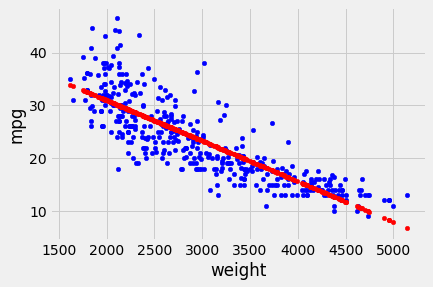

In [0]:
ax1 = df_with_predictions.plot(kind='scatter', x='weight', y='mpg', color='b')    
ax2 = df_with_predictions.plot(kind='scatter', x='weight', y='predictions', color='r', ax=ax1) 
plt.ylabel('mpg');
